In [60]:
#Hospital satisfaction

In [61]:
import pandas as pd
df = pd.read_csv('Patient_survey__HCAHPS__-_Hospital.csv')
import matplotlib.pyplot as plt
import numpy as np

In [62]:
df.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Number of Completed Surveys Footnote',
       'Survey Response Rate Percent', 'Survey Response Rate Percent Footnote',
       'Measure Start Date', 'Measure End Date', 'Location'],
      dtype='object')

In [63]:
# Data is stored as a series of objects.  
# Column names include blank spaces.  Will replace blank spaces in colun names with a '_'

df.columns = df.columns.str.replace('\s+', '_')

In [64]:
# Creating new dataframe 'yes_rec_df' which corresponds solely to the question of whether patients
# would recommend hospital to friends and family.  The 'HCAHPS_Answer_Percent' columns within this 
# dataframe represent the percentage of respondents who said they would recommend hospital.

yes_rec_df = df[df.HCAHPS_Question == 'Patients who reported YES, they would definitely recommend the hospital']

In [68]:
# Many of the HCAHPS_Aswer_Percent fields contain a a value 'Not Available'.  Those entries
# are removed since they are not relevant and cannot be plotted.

yes_rec_df = yes_rec_df[yes_rec_df.HCAHPS_Answer_Percent != 'Not Available']
len(yes_rec_df)

# len shows we have 4103 records in our list of hospitals with valid percentages to recommend quetion.

4103

In [66]:
# In order to plot histogram of how how hopitals perforomed on recommend question, data 
# is isoltated on percentage variable and converted from object to integer.

rec_percent = yes_rec_df.HCAHPS_Answer_Percent
rec_percent = yes2.astype(int)


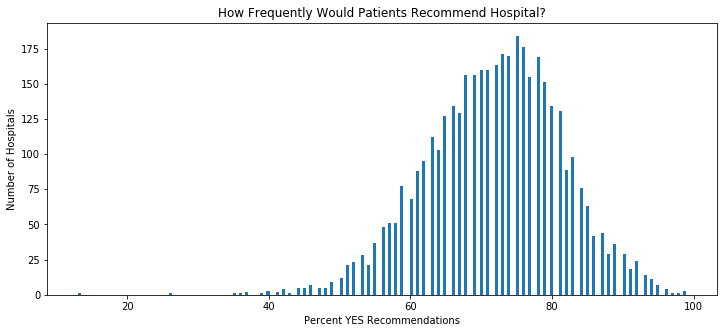

In [86]:
# Histogram showing spread of how likely hospitals are to 

plt.figure(figsize=(12, 5))
plt.hist(yes2, bins = 200)
plt.xlabel('Percent YES Recommendations')
plt.ylabel('Number of Hospitals')
plt.title('How Frequently Would Patients Recommend Hospital?')
plt.show()